In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
# Loading the dataset
df_earlier = pd.read_csv('earlier_flight_data.csv')

# Filtering the dataset
filtered_df_earlier = df_earlier[((df_earlier['Carrier Code'] == 'UA') & (df_earlier['Origin Airport'] == 'ORD')) |
                 ((df_earlier['Carrier Code'] == 'B6') & (df_earlier['Origin Airport'] == 'JFK')) |
                 ((df_earlier['Carrier Code'] == 'WN') & (df_earlier['Origin Airport'] == 'MCO'))]
filtered_df_earlier.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
3,UA,1/1/2023,2645,N23721,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0
6,UA,1/1/2024,1983,N846UA,ORD,21:09,21:02,114,110,-7,20:57,5,0,0,0,0,0
10,UA,1/2/2023,1998,N802UA,ORD,21:07,20:46,113,89,-21,20:43,3,0,0,0,0,0
13,UA,1/2/2024,1983,N891UA,ORD,21:09,20:53,114,106,-16,20:47,6,0,0,0,0,0
16,UA,1/3/2023,1998,N854UA,ORD,21:07,21:04,113,111,-3,20:58,6,0,0,0,0,0


In [3]:
# Loading the dataset
df_later = pd.read_csv('later_flight_data.csv')

#MQ,YX come under American airlines and 9E comes under Delta Airlines
df_later['Carrier Code'] = df_later['Carrier Code'].replace({'MQ': 'AA', 'YX': 'AA','9E': 'DL'})

# Filtering the dataset
filtered_df_later = df_later[((df_later['Carrier Code'] == 'AA') & (df_later['Origin Airport'] == 'ORD')) |
                 ((df_later['Carrier Code'] == 'DL') & (df_later['Origin Airport'] == 'JFK')) |
                 ((df_later['Carrier Code'] == 'B6') & (df_later['Origin Airport'] == 'MCO'))]
filtered_df_later.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
2,AA,1/1/2020,2877,N834AW,ORD,21:43,21:39,109,107,-4,21:35,4,0,0,0,0,0
15,AA,1/2/2020,2877,N772XF,ORD,21:43,21:24,109,98,-19,21:21,3,0,0,0,0,0
31,AA,1/3/2020,2877,N837AW,ORD,21:43,21:40,109,102,-3,21:35,5,0,0,0,0,0
45,AA,1/4/2020,2877,N805AW,ORD,21:43,22:15,109,118,32,21:55,20,10,0,9,0,13
59,AA,1/5/2020,2877,N822AW,ORD,21:43,21:33,109,100,-10,21:28,5,0,0,0,0,0


In [4]:
filtered_df_earlier.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)'],
      dtype='object')

In [5]:
filtered_df_earlier.isna().sum()
filtered_df_later.isna().sum()

Carrier Code                                 0
Date (MM/DD/YYYY)                            0
Flight Number                                0
Tail Number                                 43
Origin Airport                               0
Scheduled Arrival Time                       0
Actual Arrival Time                          0
Scheduled Elapsed Time (Minutes)             0
Actual Elapsed Time (Minutes)                0
Arrival Delay (Minutes)                      0
Wheels-on Time                               0
Taxi-In time (Minutes)                       0
Delay Carrier (Minutes)                      0
Delay Weather (Minutes)                      0
Delay National Aviation System (Minutes)     0
Delay Security (Minutes)                     0
Delay Late Aircraft Arrival (Minutes)        0
dtype: int64

Carrier Code                                 0
Date (MM/DD/YYYY)                            0
Flight Number                                0
Tail Number                                 35
Origin Airport                               0
Scheduled Arrival Time                       0
Actual Arrival Time                          0
Scheduled Elapsed Time (Minutes)             0
Actual Elapsed Time (Minutes)                0
Arrival Delay (Minutes)                      0
Wheels-on Time                               0
Taxi-In time (Minutes)                       0
Delay Carrier (Minutes)                      0
Delay Weather (Minutes)                      0
Delay National Aviation System (Minutes)     0
Delay Security (Minutes)                     0
Delay Late Aircraft Arrival (Minutes)        0
dtype: int64

In [6]:
#removing unwanted columns as it is not available for future predictions
filtered_df_earlier.drop(['Flight Number','Tail Number','Wheels-on Time','Taxi-In time (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)'], axis=1, inplace=True)
filtered_df_earlier.head()
filtered_df_later.drop(['Flight Number','Tail Number','Wheels-on Time','Taxi-In time (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)'], axis=1, inplace=True)
filtered_df_later.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\3866681474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_earlier.drop(['Flight Number','Tail Number','Wheels-on Time','Taxi-In time (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)'], axis=1, inplace=True)


,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes)
3,UA,1/1/2023,ORD,23:57,23:47,107,100,-10
6,UA,1/1/2024,ORD,21:09,21:02,114,110,-7
10,UA,1/2/2023,ORD,21:07,20:46,113,89,-21
13,UA,1/2/2024,ORD,21:09,20:53,114,106,-16
16,UA,1/3/2023,ORD,21:07,21:04,113,111,-3


C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\3866681474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_later.drop(['Flight Number','Tail Number','Wheels-on Time','Taxi-In time (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)'], axis=1, inplace=True)


,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes)
2,AA,1/1/2020,ORD,21:43,21:39,109,107,-4
15,AA,1/2/2020,ORD,21:43,21:24,109,98,-19
31,AA,1/3/2020,ORD,21:43,21:40,109,102,-3
45,AA,1/4/2020,ORD,21:43,22:15,109,118,32
59,AA,1/5/2020,ORD,21:43,21:33,109,100,-10


In [7]:
import pandas as pd

# Define the time formats
time_formats = ['%H:%M:%S', '%H:%M']

# Function to parse time data with multiple formats
def parse_time(time_str):
    for fmt in time_formats:
        try:
            return pd.to_datetime(time_str, format=fmt).time()
        except ValueError:
            pass
    # If none of the formats match, return None or handle the error as needed
    return None

In [8]:
filtered_df_earlier['Date (MM/DD/YYYY)'] = pd.to_datetime(filtered_df_earlier['Date (MM/DD/YYYY)'], format='%m/%d/%Y')
filtered_df_earlier['Scheduled Arrival Time'] = filtered_df_earlier['Scheduled Arrival Time'].apply(parse_time)
filtered_df_earlier['Actual Arrival Time'] = filtered_df_earlier['Actual Arrival Time'].apply(parse_time)

# Creating new features from Date 
filtered_df_earlier['Month'] = filtered_df_earlier['Date (MM/DD/YYYY)'].dt.month
filtered_df_earlier['Day'] = filtered_df_earlier['Date (MM/DD/YYYY)'].dt.day
filtered_df_earlier['Year'] = filtered_df_earlier['Date (MM/DD/YYYY)'].dt.year
filtered_df_earlier['Day of the Week'] = filtered_df_earlier['Date (MM/DD/YYYY)'].dt.day_name()
filtered_df_earlier = filtered_df_earlier.drop(columns='Date (MM/DD/YYYY)')
filtered_df_earlier.head()


filtered_df_later['Date (MM/DD/YYYY)'] = pd.to_datetime(filtered_df_later['Date (MM/DD/YYYY)'], format='%m/%d/%Y')
filtered_df_later['Scheduled Arrival Time'] = filtered_df_later['Scheduled Arrival Time'].apply(parse_time)
filtered_df_later['Actual Arrival Time'] = filtered_df_later['Actual Arrival Time'].apply(parse_time)

# Creating New Features from date
filtered_df_later['Month'] = filtered_df_later['Date (MM/DD/YYYY)'].dt.month
filtered_df_later['Day'] = filtered_df_later['Date (MM/DD/YYYY)'].dt.day
filtered_df_later['Year'] = filtered_df_later['Date (MM/DD/YYYY)'].dt.year
filtered_df_later['Day of the Week'] = filtered_df_later['Date (MM/DD/YYYY)'].dt.day_name()
filtered_df_later = filtered_df_later.drop(columns='Date (MM/DD/YYYY)')
filtered_df_later.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\2062264910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_earlier['Date (MM/DD/YYYY)'] = pd.to_datetime(filtered_df_earlier['Date (MM/DD/YYYY)'], format='%m/%d/%Y')
C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\2062264910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_earlier['Scheduled Arrival Time'] = filtered_df_earlier['Scheduled Arrival Time'].apply(parse_time)
C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\20622

,Carrier Code,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week
3,UA,ORD,23:57:00,23:47:00,107,100,-10,1,1,2023,Sunday
6,UA,ORD,21:09:00,21:02:00,114,110,-7,1,1,2024,Monday
10,UA,ORD,21:07:00,20:46:00,113,89,-21,1,2,2023,Monday
13,UA,ORD,21:09:00,20:53:00,114,106,-16,1,2,2024,Tuesday
16,UA,ORD,21:07:00,21:04:00,113,111,-3,1,3,2023,Tuesday


C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\2062264910.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_later['Date (MM/DD/YYYY)'] = pd.to_datetime(filtered_df_later['Date (MM/DD/YYYY)'], format='%m/%d/%Y')
C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\2062264910.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_later['Scheduled Arrival Time'] = filtered_df_later['Scheduled Arrival Time'].apply(parse_time)
C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\2062264910.

,Carrier Code,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week
2,AA,ORD,21:43:00,21:39:00,109,107,-4,1,1,2020,Wednesday
15,AA,ORD,21:43:00,21:24:00,109,98,-19,1,2,2020,Thursday
31,AA,ORD,21:43:00,21:40:00,109,102,-3,1,3,2020,Friday
45,AA,ORD,21:43:00,22:15:00,109,118,32,1,4,2020,Saturday
59,AA,ORD,21:43:00,21:33:00,109,100,-10,1,5,2020,Sunday


In [9]:
filtered_df_earlier.isna().sum()
filtered_df_later.isna().sum()

Carrier Code                        0
Origin Airport                      0
Scheduled Arrival Time              0
Actual Arrival Time                 9
Scheduled Elapsed Time (Minutes)    0
Actual Elapsed Time (Minutes)       0
Arrival Delay (Minutes)             0
Month                               0
Day                                 0
Year                                0
Day of the Week                     0
dtype: int64

Carrier Code                        0
Origin Airport                      0
Scheduled Arrival Time              0
Actual Arrival Time                 6
Scheduled Elapsed Time (Minutes)    0
Actual Elapsed Time (Minutes)       0
Arrival Delay (Minutes)             0
Month                               0
Day                                 0
Year                                0
Day of the Week                     0
dtype: int64

In [10]:
len(filtered_df_earlier)
len(filtered_df_later)

3448

6727

In [11]:
#dropping NaN values
filtered_df_earlier.dropna(inplace=True)
len(filtered_df_earlier)

filtered_df_later.dropna(inplace=True)
len(filtered_df_later)

3439

6721

In [12]:
#converting scheduled arrival time and actual arrival time to minutes past midnight for easier training
filtered_df_earlier['Scheduled Arrival Time (minutes past midnight)'] = pd.to_datetime(filtered_df_earlier['Scheduled Arrival Time'].astype(str)).dt.hour * 60 + pd.to_datetime(filtered_df_earlier['Scheduled Arrival Time'].astype(str)).dt.minute
filtered_df_earlier['Actual Arrival Time (minutes past midnight)'] = pd.to_datetime(filtered_df_earlier['Actual Arrival Time'].astype(str)).dt.hour * 60 + pd.to_datetime(filtered_df_earlier['Actual Arrival Time'].astype(str)).dt.minute
filtered_df_earlier.head()

filtered_df_later['Scheduled Arrival Time (minutes past midnight)'] = pd.to_datetime(filtered_df_later['Scheduled Arrival Time'].astype(str)).dt.hour * 60 + pd.to_datetime(filtered_df_later['Scheduled Arrival Time'].astype(str)).dt.minute
filtered_df_later['Actual Arrival Time (minutes past midnight)'] = pd.to_datetime(filtered_df_later['Actual Arrival Time'].astype(str)).dt.hour * 60 + pd.to_datetime(filtered_df_later['Actual Arrival Time'].astype(str)).dt.minute
filtered_df_later.head()

,Carrier Code,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight)
3,UA,ORD,23:57:00,23:47:00,107,100,-10,1,1,2023,Sunday,1437,1427
6,UA,ORD,21:09:00,21:02:00,114,110,-7,1,1,2024,Monday,1269,1262
10,UA,ORD,21:07:00,20:46:00,113,89,-21,1,2,2023,Monday,1267,1246
13,UA,ORD,21:09:00,20:53:00,114,106,-16,1,2,2024,Tuesday,1269,1253
16,UA,ORD,21:07:00,21:04:00,113,111,-3,1,3,2023,Tuesday,1267,1264


,Carrier Code,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight)
2,AA,ORD,21:43:00,21:39:00,109,107,-4,1,1,2020,Wednesday,1303,1299
15,AA,ORD,21:43:00,21:24:00,109,98,-19,1,2,2020,Thursday,1303,1284
31,AA,ORD,21:43:00,21:40:00,109,102,-3,1,3,2020,Friday,1303,1300
45,AA,ORD,21:43:00,22:15:00,109,118,32,1,4,2020,Saturday,1303,1335
59,AA,ORD,21:43:00,21:33:00,109,100,-10,1,5,2020,Sunday,1303,1293


In [13]:
#dropping original columns
filtered_df_earlier.drop(['Scheduled Arrival Time', 'Actual Arrival Time'], axis=1, inplace=True)
filtered_df_earlier.head()
len(filtered_df_earlier)

filtered_df_later.drop(['Scheduled Arrival Time', 'Actual Arrival Time'], axis=1, inplace=True)
filtered_df_later.head()
len(filtered_df_later)

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight)
3,UA,ORD,107,100,-10,1,1,2023,Sunday,1437,1427
6,UA,ORD,114,110,-7,1,1,2024,Monday,1269,1262
10,UA,ORD,113,89,-21,1,2,2023,Monday,1267,1246
13,UA,ORD,114,106,-16,1,2,2024,Tuesday,1269,1253
16,UA,ORD,113,111,-3,1,3,2023,Tuesday,1267,1264


3439

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight)
2,AA,ORD,109,107,-4,1,1,2020,Wednesday,1303,1299
15,AA,ORD,109,98,-19,1,2,2020,Thursday,1303,1284
31,AA,ORD,109,102,-3,1,3,2020,Friday,1303,1300
45,AA,ORD,109,118,32,1,4,2020,Saturday,1303,1335
59,AA,ORD,109,100,-10,1,5,2020,Sunday,1303,1293


6721

In [14]:
#calculating scheduled departure time
filtered_df_earlier['Scheduled Departure Time (minutes past midnight)'] = filtered_df_earlier['Scheduled Arrival Time (minutes past midnight)'] - filtered_df_earlier['Scheduled Elapsed Time (Minutes)']
filtered_df_earlier.head()

filtered_df_later['Scheduled Departure Time (minutes past midnight)'] = filtered_df_later['Scheduled Arrival Time (minutes past midnight)'] - filtered_df_later['Scheduled Elapsed Time (Minutes)']
filtered_df_later.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight)
3,UA,ORD,107,100,-10,1,1,2023,Sunday,1437,1427,1330
6,UA,ORD,114,110,-7,1,1,2024,Monday,1269,1262,1155
10,UA,ORD,113,89,-21,1,2,2023,Monday,1267,1246,1154
13,UA,ORD,114,106,-16,1,2,2024,Tuesday,1269,1253,1155
16,UA,ORD,113,111,-3,1,3,2023,Tuesday,1267,1264,1154


,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight)
2,AA,ORD,109,107,-4,1,1,2020,Wednesday,1303,1299,1194
15,AA,ORD,109,98,-19,1,2,2020,Thursday,1303,1284,1194
31,AA,ORD,109,102,-3,1,3,2020,Friday,1303,1300,1194
45,AA,ORD,109,118,32,1,4,2020,Saturday,1303,1335,1194
59,AA,ORD,109,100,-10,1,5,2020,Sunday,1303,1293,1194


In [15]:
#calculating actual departure time 
filtered_df_earlier['Actual Departure Time (minutes past midnight)'] = filtered_df_earlier['Actual Arrival Time (minutes past midnight)'] - filtered_df_earlier['Actual Elapsed Time (Minutes)']
filtered_df_earlier.head()

filtered_df_later['Actual Departure Time (minutes past midnight)'] = filtered_df_later['Actual Arrival Time (minutes past midnight)'] - filtered_df_later['Actual Elapsed Time (Minutes)']
filtered_df_later.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),Actual Departure Time (minutes past midnight)
3,UA,ORD,107,100,-10,1,1,2023,Sunday,1437,1427,1330,1327
6,UA,ORD,114,110,-7,1,1,2024,Monday,1269,1262,1155,1152
10,UA,ORD,113,89,-21,1,2,2023,Monday,1267,1246,1154,1157
13,UA,ORD,114,106,-16,1,2,2024,Tuesday,1269,1253,1155,1147
16,UA,ORD,113,111,-3,1,3,2023,Tuesday,1267,1264,1154,1153


,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),Actual Departure Time (minutes past midnight)
2,AA,ORD,109,107,-4,1,1,2020,Wednesday,1303,1299,1194,1192
15,AA,ORD,109,98,-19,1,2,2020,Thursday,1303,1284,1194,1186
31,AA,ORD,109,102,-3,1,3,2020,Friday,1303,1300,1194,1198
45,AA,ORD,109,118,32,1,4,2020,Saturday,1303,1335,1194,1217
59,AA,ORD,109,100,-10,1,5,2020,Sunday,1303,1293,1194,1193


In [16]:
# Loading the weather dataset
df_weather = pd.read_csv('weather_data.csv')

In [17]:
df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Syracuse New York,1/1/2020,1.70,-1.20,0.30,-3.40,-7.00,-5.30,-5.60,64.40,...,3.00,2,NaN,2020-01-01T07:36:11,2020-01-01T16:40:01,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,72519014771,72514654773,KFZY,AS511,725196..."
1,Syracuse New York,1/2/2020,10.60,-2.10,4.90,10.60,-6.10,2.10,-4.60,51.80,...,6.60,4,NaN,2020-01-02T07:36:15,2020-01-02T16:40:53,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,72519014771,72514654773,KFZY,AS511,725196..."
2,Syracuse New York,1/3/2020,9.90,5.70,7.90,8.40,4.50,6.10,2.60,69.80,...,1.80,1,NaN,2020-01-03T07:36:17,2020-01-03T16:41:48,0.27,Overcast,Cloudy skies throughout the day.,cloudy,"KSYR,72519014771,72514654773,KFZY,AS511,725196..."
3,Syracuse New York,1/4/2020,5.60,0.70,3.00,5.60,-3.80,0.20,1.30,88.80,...,0.80,1,NaN,2020-01-04T07:36:16,2020-01-04T16:42:44,0.30,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,snow,"KSYR,72519014771,72514654773,KFZY,AS511,725196..."
4,Syracuse New York,1/5/2020,0.70,-1.20,-0.50,-3.20,-7.50,-5.20,-4.70,73.50,...,3.90,3,NaN,2020-01-05T07:36:13,2020-01-05T16:43:42,0.34,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"KSYR,72519014771,72514654773,KFZY,AS511,725196..."


In [18]:
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'], format='%m/%d/%Y')

# Creating New Features from datetime
df_weather['Month'] = df_weather['datetime'].dt.month
df_weather['Day'] = df_weather['datetime'].dt.day
df_weather['Year'] = df_weather['datetime'].dt.year
df_weather = df_weather.drop(columns='datetime')
df_weather.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sunrise,sunset,moonphase,conditions,description,icon,stations,Month,Day,Year
0,Syracuse New York,1.70,-1.20,0.30,-3.40,-7.00,-5.30,-5.60,64.40,0.00,...,2020-01-01T07:36:11,2020-01-01T16:40:01,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,72519014771,72514654773,KFZY,AS511,725196...",1,1,2020
1,Syracuse New York,10.60,-2.10,4.90,10.60,-6.10,2.10,-4.60,51.80,0.00,...,2020-01-02T07:36:15,2020-01-02T16:40:53,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,72519014771,72514654773,KFZY,AS511,725196...",1,2,2020
2,Syracuse New York,9.90,5.70,7.90,8.40,4.50,6.10,2.60,69.80,0.00,...,2020-01-03T07:36:17,2020-01-03T16:41:48,0.27,Overcast,Cloudy skies throughout the day.,cloudy,"KSYR,72519014771,72514654773,KFZY,AS511,725196...",1,3,2020
3,Syracuse New York,5.60,0.70,3.00,5.60,-3.80,0.20,1.30,88.80,10.11,...,2020-01-04T07:36:16,2020-01-04T16:42:44,0.30,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,snow,"KSYR,72519014771,72514654773,KFZY,AS511,725196...",1,4,2020
4,Syracuse New York,0.70,-1.20,-0.50,-3.20,-7.50,-5.20,-4.70,73.50,1.53,...,2020-01-05T07:36:13,2020-01-05T16:43:42,0.34,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"KSYR,72519014771,72514654773,KFZY,AS511,725196...",1,5,2020


In [19]:
df_weather.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations', 'Month',
       'Day', 'Year'],
      dtype='object')

In [20]:
#dropping unwanted columns
df_weather.drop(['name','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','preciptype','sealevelpressure','solarradiation','solarenergy','uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'], axis=1, inplace=True)
df_weather.head()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility,Month,Day,Year
0,0.30,-5.60,64.40,0.00,0,0.00,0.50,1.00,51.60,34.50,250.80,89.50,15.90,1,1,2020
1,4.90,-4.60,51.80,0.00,0,0.00,0.00,0.20,37.10,27.10,200.00,70.10,16.00,1,2,2020
2,7.90,2.60,69.80,0.00,0,0.00,0.00,0.00,32.40,16.00,226.40,96.00,15.10,1,3,2020
3,3.00,1.30,88.80,10.11,100,66.67,0.60,0.20,32.80,20.10,313.80,92.90,10.90,1,4,2020
4,-0.50,-4.70,73.50,1.53,100,25.00,0.50,0.80,60.60,31.30,287.00,82.10,13.50,1,5,2020


In [21]:
# Merging weather data with the earlier flight data on Day, Month, and Year
merged_data_earlier = pd.merge(filtered_df_earlier, df_weather, on=['Day', 'Month', 'Year'], how='left')

# Merging weather data with the latter flight data on Day, Month, and Year
merged_data_later = pd.merge(filtered_df_later, df_weather, on=['Day', 'Month', 'Year'], how='left')

merged_data_earlier.shape
merged_data_later.shape

(3439, 26)

(6721, 26)

In [22]:
merged_data_earlier.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),...,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility
0,UA,ORD,107,100,-10,1,1,2023,Sunday,1437,...,0.41,100,20.83,0.00,0.00,42.90,31.50,267.10,100.00,14.20
1,UA,ORD,114,110,-7,1,1,2024,Monday,1269,...,0.00,0,0.00,0.30,0.00,18.40,18.00,304.80,98.40,14.70
2,UA,ORD,113,89,-21,1,2,2023,Monday,1267,...,0.00,0,0.00,0.00,0.00,22.30,18.10,275.40,99.60,15.00
3,UA,ORD,114,106,-16,1,2,2024,Tuesday,1269,...,0.00,0,0.00,0.00,0.00,36.90,23.30,241.80,100.00,16.00
4,UA,ORD,113,111,-3,1,3,2023,Tuesday,1267,...,5.88,100,41.67,0.00,0.00,13.00,14.40,69.40,98.60,9.80


In [23]:
merged_data_later.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Day of the Week,Scheduled Arrival Time (minutes past midnight),...,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility
0,AA,ORD,109,107,-4,1,1,2020,Wednesday,1303,...,0.00,0,0.00,0.50,1.00,51.60,34.50,250.80,89.50,15.90
1,AA,ORD,109,98,-19,1,2,2020,Thursday,1303,...,0.00,0,0.00,0.00,0.20,37.10,27.10,200.00,70.10,16.00
2,AA,ORD,109,102,-3,1,3,2020,Friday,1303,...,0.00,0,0.00,0.00,0.00,32.40,16.00,226.40,96.00,15.10
3,AA,ORD,109,118,32,1,4,2020,Saturday,1303,...,10.11,100,66.67,0.60,0.20,32.80,20.10,313.80,92.90,10.90
4,AA,ORD,109,100,-10,1,5,2020,Sunday,1303,...,1.53,100,25.00,0.50,0.80,60.60,31.30,287.00,82.10,13.50


In [24]:
merged_data_earlier.isna().sum()
merged_data_later.isna().sum()

Carrier Code                                        0
Origin Airport                                      0
Scheduled Elapsed Time (Minutes)                    0
Actual Elapsed Time (Minutes)                       0
Arrival Delay (Minutes)                             0
Month                                               0
Day                                                 0
Year                                                0
Day of the Week                                     0
Scheduled Arrival Time (minutes past midnight)      0
Actual Arrival Time (minutes past midnight)         0
Scheduled Departure Time (minutes past midnight)    0
Actual Departure Time (minutes past midnight)       0
temp                                                0
dew                                                 0
humidity                                            0
precip                                              0
precipprob                                          0
precipcover                 

Carrier Code                                        0
Origin Airport                                      0
Scheduled Elapsed Time (Minutes)                    0
Actual Elapsed Time (Minutes)                       0
Arrival Delay (Minutes)                             0
Month                                               0
Day                                                 0
Year                                                0
Day of the Week                                     0
Scheduled Arrival Time (minutes past midnight)      0
Actual Arrival Time (minutes past midnight)         0
Scheduled Departure Time (minutes past midnight)    0
Actual Departure Time (minutes past midnight)       0
temp                                                0
dew                                                 0
humidity                                            0
precip                                              0
precipprob                                          0
precipcover                 

In [25]:
day_to_int_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

#applying the mapping to the entire 'Day of the Week' column
merged_data_earlier['Day of the Week in number'] = merged_data_earlier['Day of the Week'].map(day_to_int_mapping)
merged_data_later['Day of the Week in number'] = merged_data_later['Day of the Week'].map(day_to_int_mapping)
merged_data_earlier.drop(['Day of the Week'], axis=1, inplace=True)
merged_data_later.drop(['Day of the Week'], axis=1, inplace=True)


In [26]:
merged_data_later.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),...,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility,Day of the Week in number
0,AA,ORD,109,107,-4,1,1,2020,1303,1299,...,0,0.00,0.50,1.00,51.60,34.50,250.80,89.50,15.90,3
1,AA,ORD,109,98,-19,1,2,2020,1303,1284,...,0,0.00,0.00,0.20,37.10,27.10,200.00,70.10,16.00,4
2,AA,ORD,109,102,-3,1,3,2020,1303,1300,...,0,0.00,0.00,0.00,32.40,16.00,226.40,96.00,15.10,5
3,AA,ORD,109,118,32,1,4,2020,1303,1335,...,100,66.67,0.60,0.20,32.80,20.10,313.80,92.90,10.90,6
4,AA,ORD,109,100,-10,1,5,2020,1303,1293,...,100,25.00,0.50,0.80,60.60,31.30,287.00,82.10,13.50,7


In [27]:
#encoding the categorical variables
data_encoded_later = pd.get_dummies(merged_data_later, columns=['Carrier Code','Origin Airport'])
data_encoded_earlier = pd.get_dummies(merged_data_earlier, columns=['Carrier Code','Origin Airport'])

data_encoded_later.head()
data_encoded_later.dtypes

data_encoded_earlier.head()
data_encoded_earlier.dtypes

,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),Actual Departure Time (minutes past midnight),...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
0,109,107,-4,1,1,2020,1303,1299,1194,1192,...,250.80,89.50,15.90,3,1,0,0,0,0,1
1,109,98,-19,1,2,2020,1303,1284,1194,1186,...,200.00,70.10,16.00,4,1,0,0,0,0,1
2,109,102,-3,1,3,2020,1303,1300,1194,1198,...,226.40,96.00,15.10,5,1,0,0,0,0,1
3,109,118,32,1,4,2020,1303,1335,1194,1217,...,313.80,92.90,10.90,6,1,0,0,0,0,1
4,109,100,-10,1,5,2020,1303,1293,1194,1193,...,287.00,82.10,13.50,7,1,0,0,0,0,1


Scheduled Elapsed Time (Minutes)                      int64
Actual Elapsed Time (Minutes)                         int64
Arrival Delay (Minutes)                               int64
Month                                                 int64
Day                                                   int64
Year                                                  int64
Scheduled Arrival Time (minutes past midnight)        int64
Actual Arrival Time (minutes past midnight)           int64
Scheduled Departure Time (minutes past midnight)      int64
Actual Departure Time (minutes past midnight)         int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                    

,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),Actual Departure Time (minutes past midnight),...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_B6,Carrier Code_UA,Carrier Code_WN,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
0,107,100,-10,1,1,2023,1437,1427,1330,1327,...,267.10,100.00,14.20,7,0,1,0,0,0,1
1,114,110,-7,1,1,2024,1269,1262,1155,1152,...,304.80,98.40,14.70,1,0,1,0,0,0,1
2,113,89,-21,1,2,2023,1267,1246,1154,1157,...,275.40,99.60,15.00,1,0,1,0,0,0,1
3,114,106,-16,1,2,2024,1269,1253,1155,1147,...,241.80,100.00,16.00,2,0,1,0,0,0,1
4,113,111,-3,1,3,2023,1267,1264,1154,1153,...,69.40,98.60,9.80,2,0,1,0,0,0,1


Scheduled Elapsed Time (Minutes)                      int64
Actual Elapsed Time (Minutes)                         int64
Arrival Delay (Minutes)                               int64
Month                                                 int64
Day                                                   int64
Year                                                  int64
Scheduled Arrival Time (minutes past midnight)        int64
Actual Arrival Time (minutes past midnight)           int64
Scheduled Departure Time (minutes past midnight)      int64
Actual Departure Time (minutes past midnight)         int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                    

C:\Users\aksha\AppData\Local\Temp\ipykernel_11444\77162113.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data_earlier.corr()


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Merged Data')

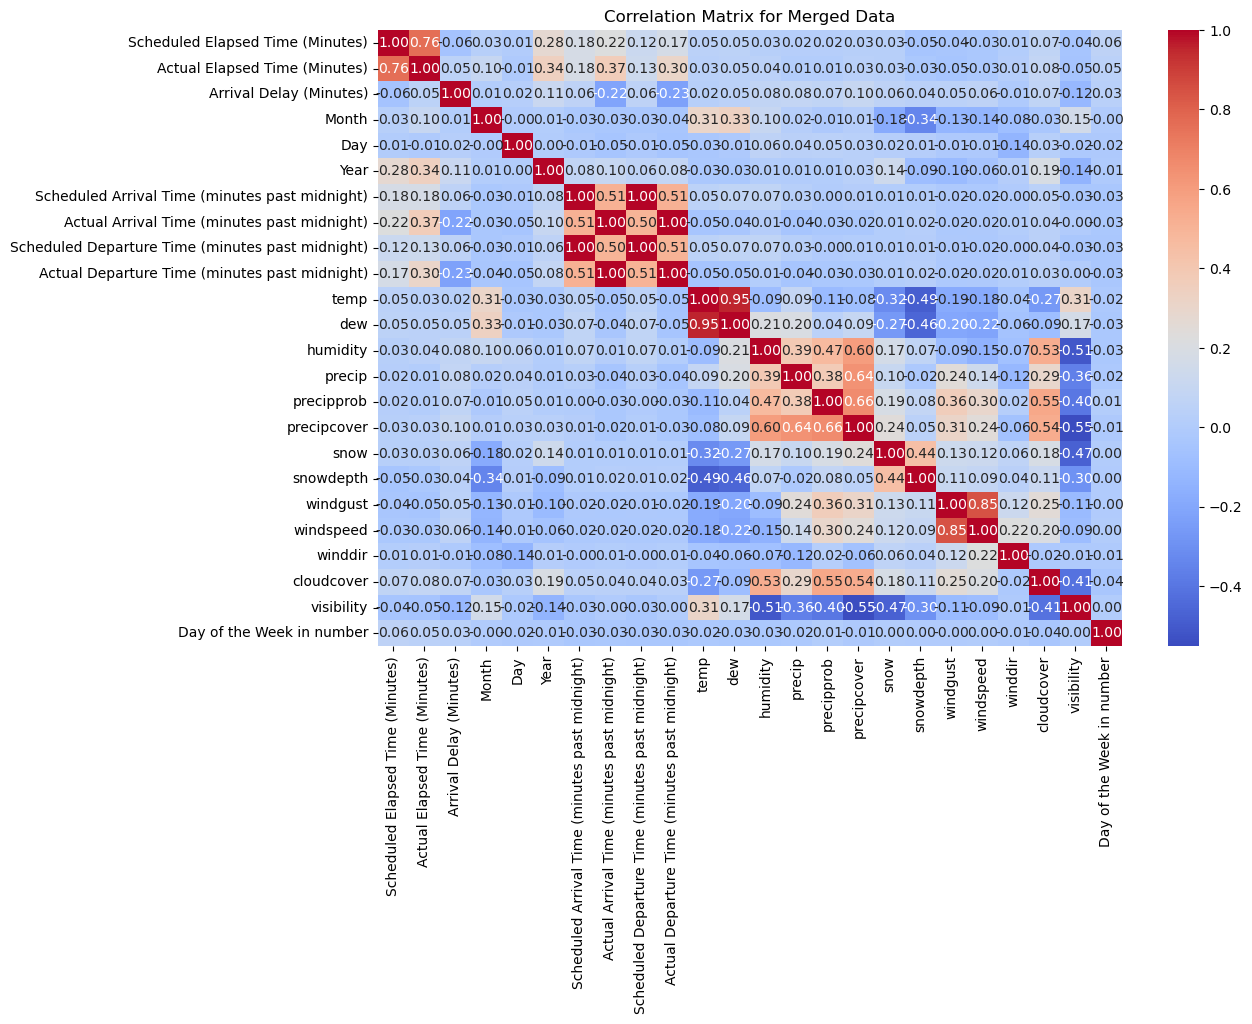

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Day of the Week in number', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs Day of the Week in number')

Text(0.5, 0, 'Day of the Week in number')

Text(0, 0.5, 'Arrival Delay (Minutes)')

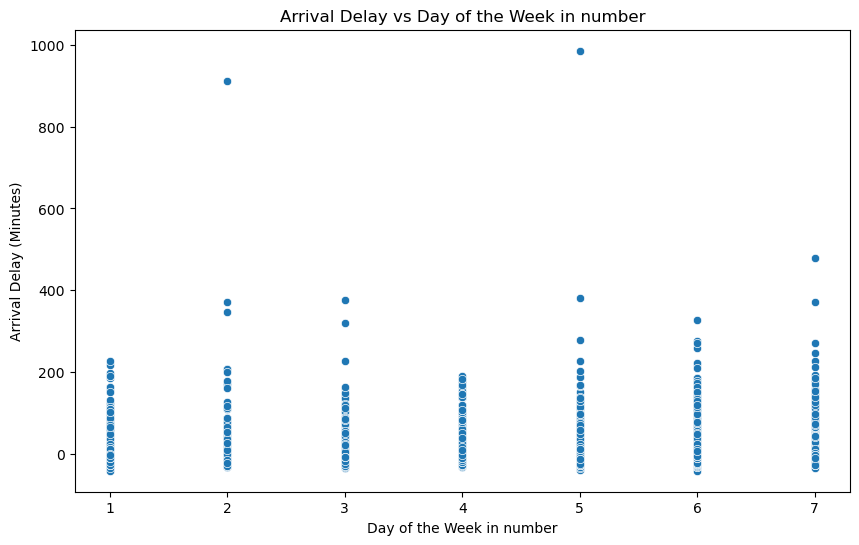

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Arrival Delay (Minutes)')

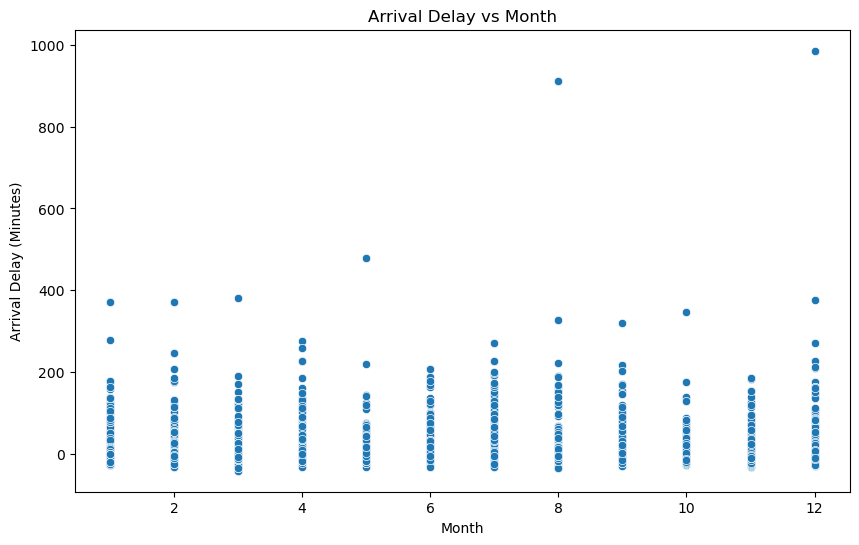

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Day', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Arrival Delay (Minutes)')

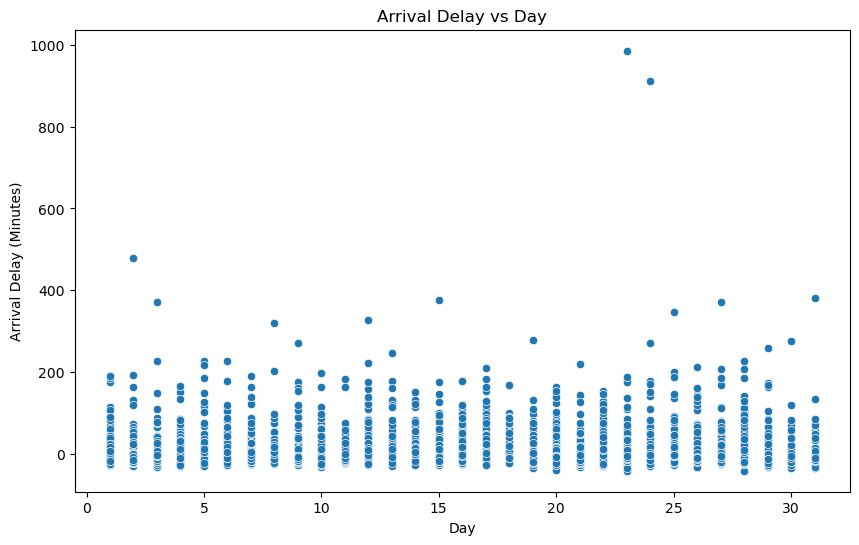

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='precip', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs precip')

Text(0.5, 0, 'precip')

Text(0, 0.5, 'Arrival Delay (Minutes)')

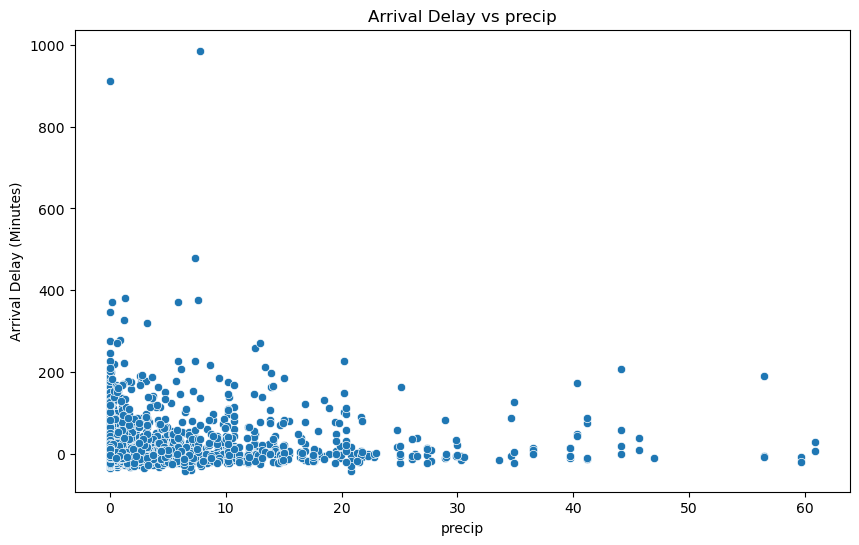

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Arrival Delay (Minutes)')

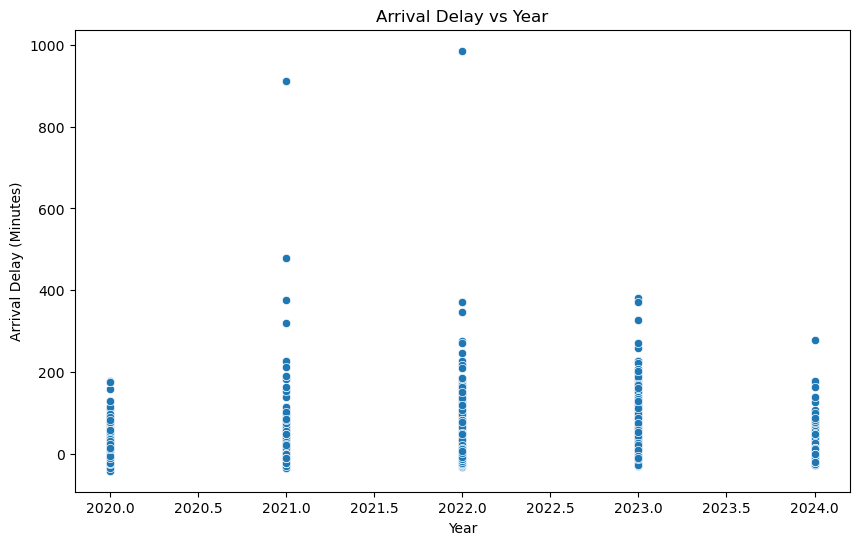

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='snow', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs snow')

Text(0.5, 0, 'snow')

Text(0, 0.5, 'Arrival Delay (Minutes)')

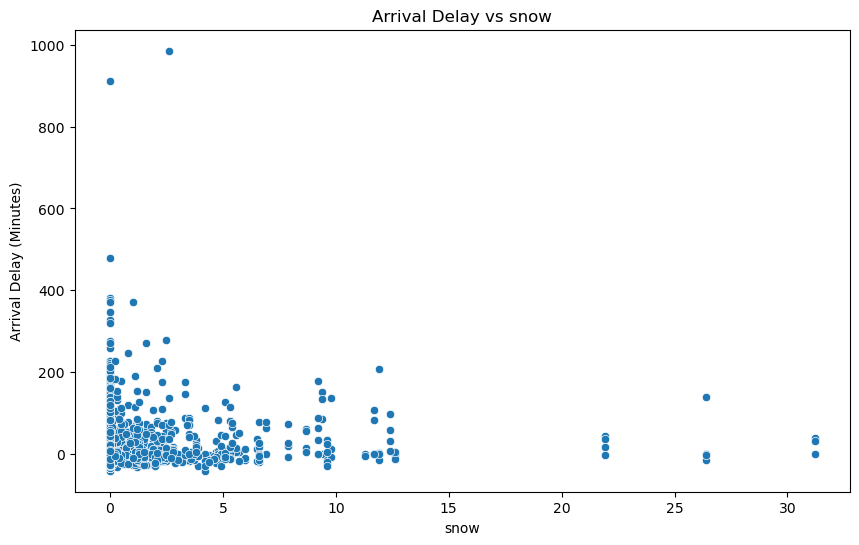

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='windspeed', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs windspeed')

Text(0.5, 0, 'windspeed')

Text(0, 0.5, 'Arrival Delay (Minutes)')

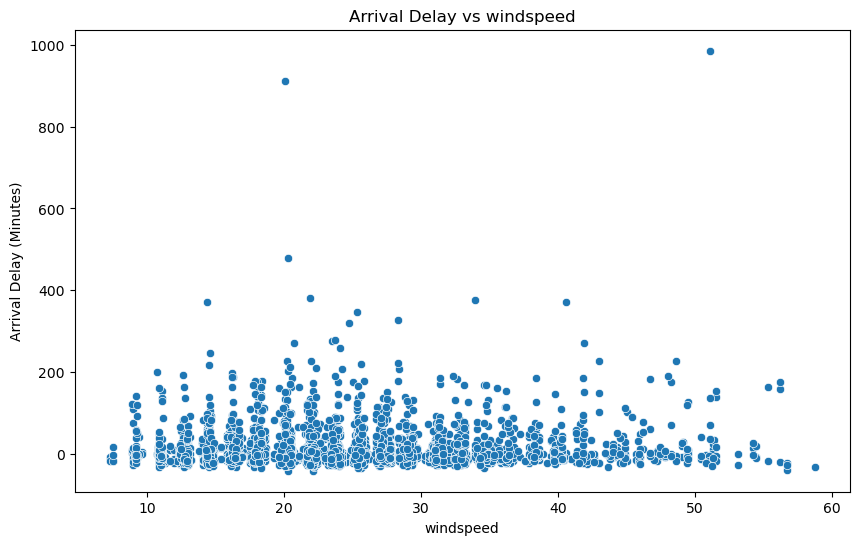

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='winddir', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs winddir')

Text(0.5, 0, 'winddir')

Text(0, 0.5, 'Arrival Delay (Minutes)')

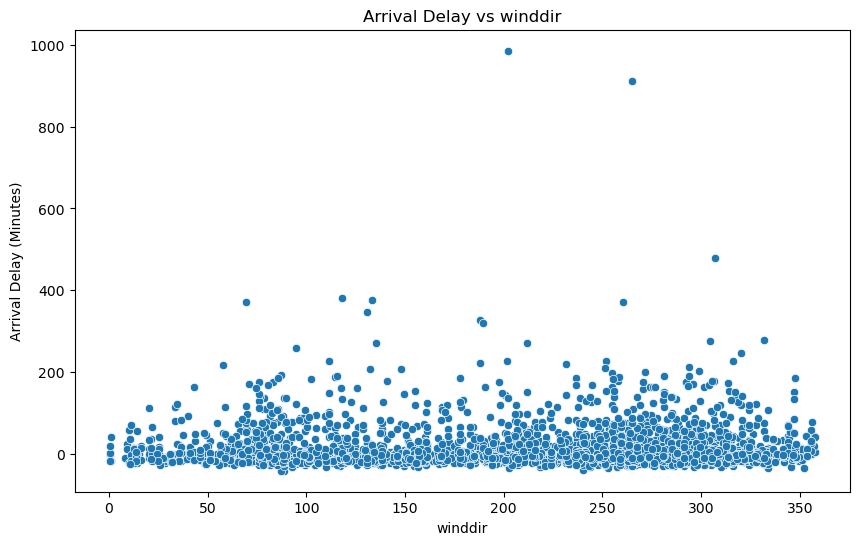

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='visibility', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs visibility')

Text(0.5, 0, 'visibility')

Text(0, 0.5, 'Arrival Delay (Minutes)')

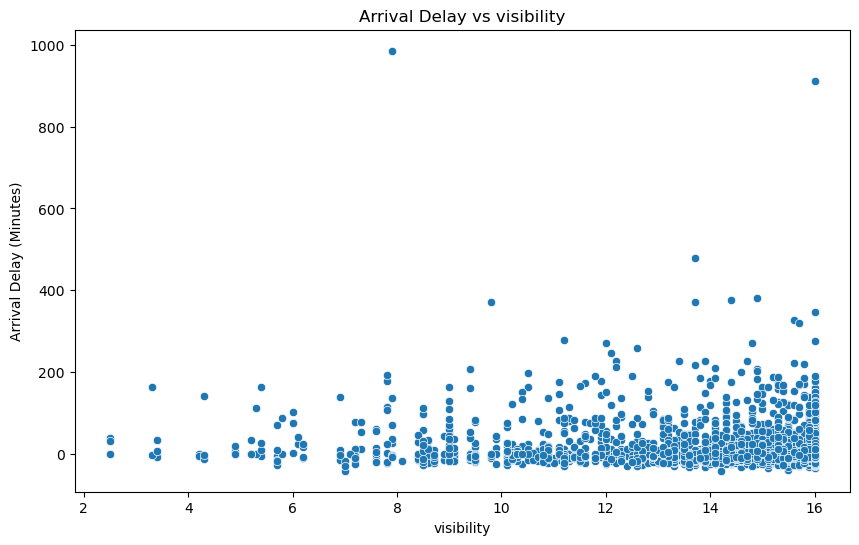

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='temp', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs temp')

Text(0.5, 0, 'temp')

Text(0, 0.5, 'Arrival Delay (Minutes)')

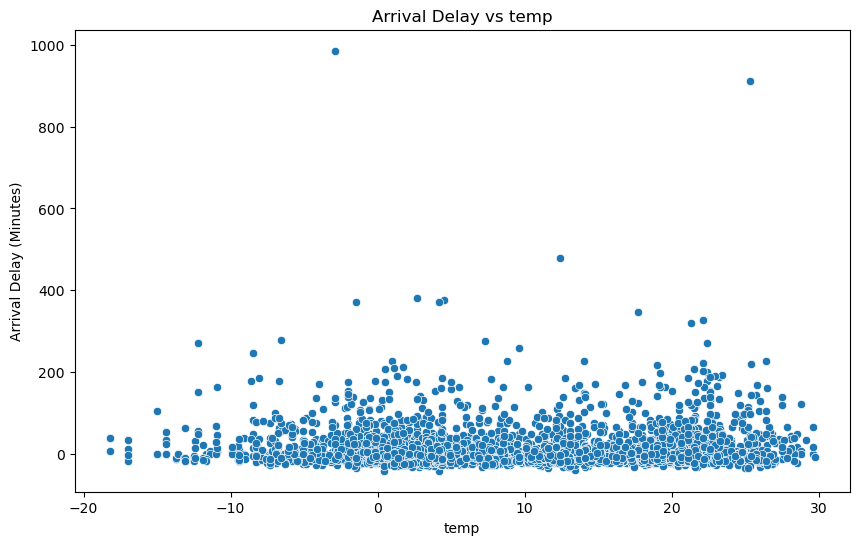

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='dew', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs dew')

Text(0.5, 0, 'dew')

Text(0, 0.5, 'Arrival Delay (Minutes)')

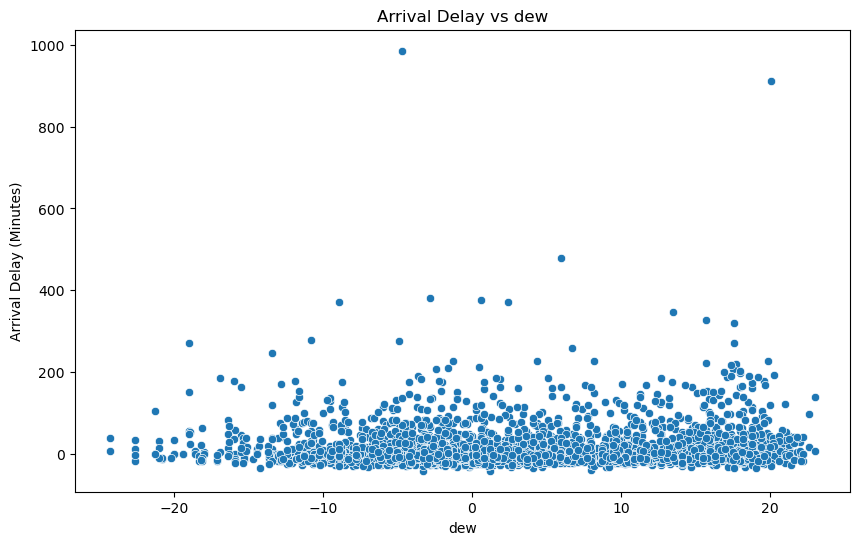

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='humidity', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs humidity')

Text(0.5, 0, 'humidity')

Text(0, 0.5, 'Arrival Delay (Minutes)')

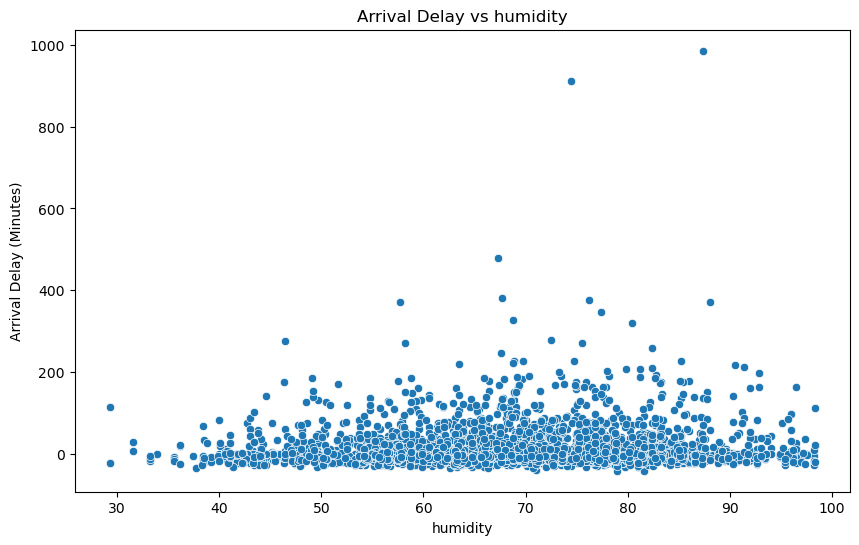

In [28]:
import seaborn as sns

# Creating a correlation matrix of the numerical features
correlation_matrix = merged_data_earlier.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Merged Data')
plt.show()

features_to_plot = ['Day of the Week in number', 'Month', 'Day', 'precip', 'Year', 'snow', 'windspeed', 'winddir', 'visibility', 'temp', 'dew', 'humidity']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_data_earlier, x=feature, y='Arrival Delay (Minutes)')
    plt.title(f'Arrival Delay vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Arrival Delay (Minutes)')
    plt.show()

In [29]:
#function to map Arrival Delay to Arrival Status
def map_arrival_status(arrival_delay):
    if arrival_delay < -5:
        return 0
    elif -5 <= arrival_delay <= 5:
        return 1
    else:
        return 2

In [30]:
# Applying the function to create the Arrival Status column
data_encoded_earlier['Arrival Status'] = data_encoded_earlier['Arrival Delay (Minutes)'].apply(map_arrival_status)
data_encoded_earlier.head()
data_encoded_later['Arrival Status'] = data_encoded_later['Arrival Delay (Minutes)'].apply(map_arrival_status)
data_encoded_later.head()

data_encoded_earlier.drop(['windgust'],axis=1,inplace=True)
data_encoded_later.drop(['windgust'],axis=1,inplace=True)

,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),Actual Departure Time (minutes past midnight),...,cloudcover,visibility,Day of the Week in number,Carrier Code_B6,Carrier Code_UA,Carrier Code_WN,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD,Arrival Status
0,107,100,-10,1,1,2023,1437,1427,1330,1327,...,100.00,14.20,7,0,1,0,0,0,1,0
1,114,110,-7,1,1,2024,1269,1262,1155,1152,...,98.40,14.70,1,0,1,0,0,0,1,0
2,113,89,-21,1,2,2023,1267,1246,1154,1157,...,99.60,15.00,1,0,1,0,0,0,1,0
3,114,106,-16,1,2,2024,1269,1253,1155,1147,...,100.00,16.00,2,0,1,0,0,0,1,0
4,113,111,-3,1,3,2023,1267,1264,1154,1153,...,98.60,9.80,2,0,1,0,0,0,1,1


,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Actual Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),Actual Departure Time (minutes past midnight),...,cloudcover,visibility,Day of the Week in number,Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD,Arrival Status
0,109,107,-4,1,1,2020,1303,1299,1194,1192,...,89.50,15.90,3,1,0,0,0,0,1,1
1,109,98,-19,1,2,2020,1303,1284,1194,1186,...,70.10,16.00,4,1,0,0,0,0,1,0
2,109,102,-3,1,3,2020,1303,1300,1194,1198,...,96.00,15.10,5,1,0,0,0,0,1,1
3,109,118,32,1,4,2020,1303,1335,1194,1217,...,92.90,10.90,6,1,0,0,0,0,1,2
4,109,100,-10,1,5,2020,1303,1293,1194,1193,...,82.10,13.50,7,1,0,0,0,0,1,0


In [31]:
target_variable = 'Arrival Status'

# Calculating correlations
correlations = data_encoded_later.corr()[target_variable].sort_values(ascending=False)
print("Correlation with Arrival Delay:")
print(correlations)

Correlation with Arrival Delay:
Arrival Status                                      1.00
Arrival Delay (Minutes)                             0.54
Actual Elapsed Time (Minutes)                       0.36
Scheduled Elapsed Time (Minutes)                    0.24
Origin Airport_MCO                                  0.21
Carrier Code_B6                                     0.21
precip                                              0.11
Scheduled Arrival Time (minutes past midnight)      0.11
humidity                                            0.09
Scheduled Departure Time (minutes past midnight)    0.09
precipcover                                         0.08
Year                                                0.08
Origin Airport_ORD                                  0.07
Carrier Code_AA                                     0.07
precipprob                                          0.07
snow                                                0.06
cloudcover                                          0.06

In [32]:
data_encoded_later.drop(columns=['Arrival Delay (Minutes)','Actual Elapsed Time (Minutes)','Scheduled Elapsed Time (Minutes)','Actual Arrival Time (minutes past midnight)','Actual Departure Time (minutes past midnight)'], inplace=True)
data_encoded_later.head()
X_lat = data_encoded_later.drop(columns=['Arrival Status'])
y_lat = data_encoded_later['Arrival Status']  # Target
X_train, X_test, y_train, y_test = train_test_split(X_lat, y_lat, test_size=0.2, random_state=42)

X_train
X_test
y_train
y_test

X_train.dtypes
X_test.dtypes
y_train.dtypes
y_test.dtypes

,Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),temp,dew,humidity,precip,precipprob,...,cloudcover,visibility,Day of the Week in number,Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD,Arrival Status
0,1,1,2020,1303,1194,0.30,-5.60,64.40,0.00,0,...,89.50,15.90,3,1,0,0,0,0,1,1
1,1,2,2020,1303,1194,4.90,-4.60,51.80,0.00,0,...,70.10,16.00,4,1,0,0,0,0,1,0
2,1,3,2020,1303,1194,7.90,2.60,69.80,0.00,0,...,96.00,15.10,5,1,0,0,0,0,1,1
3,1,4,2020,1303,1194,3.00,1.30,88.80,10.11,100,...,92.90,10.90,6,1,0,0,0,0,1,2
4,1,5,2020,1303,1194,-0.50,-4.70,73.50,1.53,100,...,82.10,13.50,7,1,0,0,0,0,1,0


,Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),temp,dew,humidity,precip,precipprob,...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
881,9,1,2023,667,555,17.50,10.40,65.60,0.00,0,...,133.40,33.30,16.00,5,1,0,0,0,0,1
4838,9,27,2022,680,599,14.10,9.50,74.40,17.65,100,...,220.00,85.00,14.60,2,0,0,1,1,0,0
1253,10,13,2022,972,855,15.20,10.90,76.30,14.69,100,...,150.10,99.60,13.80,4,1,0,0,0,0,1
5921,3,20,2020,1081,918,13.40,8.00,71.00,7.04,100,...,239.90,71.10,15.50,5,0,1,0,0,1,0
6123,5,21,2023,1142,975,15.90,8.60,63.70,0.00,0,...,283.60,79.50,15.80,7,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,4,22,2023,12,-70,16.20,8.70,63.80,14.79,100,...,132.90,92.00,13.90,6,0,0,1,1,0,0
5191,11,6,2022,674,599,20.60,14.10,67.80,8.54,100,...,194.40,88.70,15.40,7,0,0,1,1,0,0
5226,11,10,2023,7,-90,7.80,-1.30,53.30,0.00,0,...,251.40,87.50,16.00,5,0,0,1,1,0,0
5390,12,2,2023,7,-90,6.90,4.80,86.30,0.29,100,...,348.00,100.00,6.20,6,0,0,1,1,0,0


,Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),temp,dew,humidity,precip,precipprob,...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
3552,3,30,2020,743,660,8.70,5.00,78.30,12.30,100,...,245.30,73.90,15.00,1,0,0,1,1,0,0
4108,6,2,2022,844,763,18.60,12.80,70.50,1.46,100,...,286.70,83.20,16.00,4,0,0,1,1,0,0
549,7,10,2020,1071,960,28.10,19.80,63.00,2.36,100,...,114.10,49.80,15.80,5,1,0,0,0,0,1
1163,9,30,2023,969,861,17.30,12.20,73.70,0.00,0,...,343.80,40.10,14.60,6,1,0,0,0,0,1
1881,4,3,2023,1010,895,7.60,-4.30,45.70,1.49,100,...,187.20,75.10,15.80,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,10,11,2022,674,599,11.30,5.40,70.60,0.00,0,...,134.70,20.60,16.00,2,0,0,1,1,0,0
4335,7,9,2022,655,571,20.50,10.20,54.80,0.00,0,...,324.20,40.10,16.00,6,0,0,1,1,0,0
422,5,27,2020,657,550,26.10,17.20,59.50,0.00,0,...,161.40,40.90,16.00,3,1,0,0,0,0,1
1650,12,23,2022,962,845,-2.90,-4.70,87.40,7.81,100,...,202.00,99.60,7.90,5,1,0,0,0,0,1


881     0
4838    2
1253    0
5921    0
6123    0
       ..
3772    1
5191    0
5226    1
5390    0
860     0
Name: Arrival Status, Length: 5376, dtype: int64

3552    0
4108    1
549     2
1163    1
1881    1
       ..
4963    0
4335    2
422     2
1650    1
1483    2
Name: Arrival Status, Length: 1345, dtype: int64

Month                                                 int64
Day                                                   int64
Year                                                  int64
Scheduled Arrival Time (minutes past midnight)        int64
Scheduled Departure Time (minutes past midnight)      int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                                float64
snowdepth                                           float64
windspeed                                           float64
winddir                                             float64
cloudcover                                          float64
visibility                              

Month                                                 int64
Day                                                   int64
Year                                                  int64
Scheduled Arrival Time (minutes past midnight)        int64
Scheduled Departure Time (minutes past midnight)      int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                                float64
snowdepth                                           float64
windspeed                                           float64
winddir                                             float64
cloudcover                                          float64
visibility                              

dtype('int64')

dtype('int64')

In [33]:
data_encoded_later.isna().sum()

Month                                               0
Day                                                 0
Year                                                0
Scheduled Arrival Time (minutes past midnight)      0
Scheduled Departure Time (minutes past midnight)    0
temp                                                0
dew                                                 0
humidity                                            0
precip                                              0
precipprob                                          0
precipcover                                         0
snow                                                0
snowdepth                                           0
windspeed                                           0
winddir                                             0
cloudcover                                          0
visibility                                          0
Day of the Week in number                           0
Carrier Code_AA             

In [34]:
from sklearn.model_selection import cross_val_score

#Initializing the Random Forest Classifier
rf_classifier_latter = RandomForestClassifier(
    random_state=50,
    max_features='sqrt',
    n_estimators=100, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    max_depth=15 
)

# Performing cross-validation to evaluate the performance of the model
cv_scores = cross_val_score(rf_classifier_latter, X_train, y_train, cv=10)
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


rf_classifier_latter.fit(X_train, y_train)
train_predictions = rf_classifier_latter.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = rf_classifier_latter.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
train_predictions
test_predictions

CV Scores: [0.58178439 0.58550186 0.5929368  0.56505576 0.58178439 0.57063197
 0.5679702  0.56610801 0.54934823 0.5679702 ]
Mean CV Score: 0.5729091815330938


RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       random_state=50)

Training accuracy: 0.7838541666666666
Testing accuracy: 0.5866171003717472


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

In [35]:
data_encoded_earlier.drop(columns=['Arrival Delay (Minutes)','Actual Elapsed Time (Minutes)','Scheduled Elapsed Time (Minutes)','Actual Arrival Time (minutes past midnight)','Actual Departure Time (minutes past midnight)'], inplace=True)
X_early = data_encoded_earlier.drop(columns=['Arrival Status'])
y_early = data_encoded_earlier['Arrival Status'] 

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_early, y_early, test_size=0.2, random_state=42)

X_train1
X_test1
y_train1
y_test1

X_train1.dtypes
X_test1.dtypes
y_train1.dtypes
y_test1.dtypes

,Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),temp,dew,humidity,precip,precipprob,...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_B6,Carrier Code_UA,Carrier Code_WN,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
1431,1,30,2024,1126,1049,-0.60,-4.10,77.00,0.00,0,...,127.50,100.00,16.00,2,1,0,0,1,0,0
1660,3,9,2023,883,810,-1.90,-6.20,72.50,0.00,0,...,295.00,68.50,15.90,4,1,0,0,1,0,0
572,7,19,2022,1013,898,26.50,19.70,67.60,0.01,100,...,264.50,67.70,15.90,2,0,1,0,0,0,1
2181,6,24,2021,1388,1310,20.70,8.80,50.40,0.00,0,...,153.70,36.00,16.00,4,1,0,0,1,0,0
969,10,21,2022,1007,900,10.80,-2.80,40.90,0.00,0,...,178.00,47.70,16.00,5,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,28,2021,1251,1140,0.30,-1.80,86.30,1.94,100,...,105.80,99.40,11.10,7,0,1,0,0,0,1
1130,12,8,2023,1261,1150,5.30,0.20,70.40,0.01,100,...,106.10,91.00,14.10,5,0,1,0,0,0,1
1294,1,14,2022,643,565,-5.50,-9.10,76.30,0.00,100,...,330.10,77.30,14.60,5,1,0,0,1,0,0
860,9,23,2022,18,-92,9.30,3.50,67.80,1.36,100,...,308.20,89.60,15.70,5,0,1,0,0,0,1


,Month,Day,Year,Scheduled Arrival Time (minutes past midnight),Scheduled Departure Time (minutes past midnight),temp,dew,humidity,precip,precipprob,...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_B6,Carrier Code_UA,Carrier Code_WN,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
1714,3,19,2021,1342,1260,-1.50,-14.20,37.70,0.00,0,...,333.70,25.90,16.00,5,1,0,0,1,0,0
3432,12,26,2023,780,620,4.30,3.10,92.00,0.65,100,...,74.50,87.70,9.40,2,0,0,1,0,1,0
929,10,10,2022,1278,1161,11.40,5.90,69.80,0.89,100,...,267.90,72.70,15.90,1,0,1,0,0,0,1
2970,11,26,2021,1388,1315,3.00,0.70,85.30,9.19,100,...,265.50,100.00,10.20,5,1,0,0,1,0,0
203,3,7,2020,6,-105,-1.80,-9.30,57.70,0.00,0,...,314.00,32.00,15.90,6,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1,28,2020,542,465,-1.20,-4.60,77.90,0.57,100,...,300.70,84.00,13.50,2,1,0,0,1,0,0
2236,7,8,2020,660,595,26.80,19.60,65.70,4.18,100,...,196.10,46.00,16.00,3,1,0,0,1,0,0
1091,11,27,2021,1251,1140,-0.10,-5.20,69.40,0.28,100,...,291.40,96.10,14.60,6,0,1,0,0,0,1
1437,1,31,2023,869,796,-5.10,-10.70,66.00,0.66,100,...,297.00,95.50,12.00,2,1,0,0,1,0,0


1431    0
1660    0
572     1
2181    2
969     0
       ..
1095    0
1130    0
1294    0
860     0
3174    0
Name: Arrival Status, Length: 2751, dtype: int64

1714    0
3432    2
929     0
2970    1
203     0
       ..
1407    1
2236    0
1091    0
1437    2
1501    2
Name: Arrival Status, Length: 688, dtype: int64

Month                                                 int64
Day                                                   int64
Year                                                  int64
Scheduled Arrival Time (minutes past midnight)        int64
Scheduled Departure Time (minutes past midnight)      int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                                float64
snowdepth                                           float64
windspeed                                           float64
winddir                                             float64
cloudcover                                          float64
visibility                              

Month                                                 int64
Day                                                   int64
Year                                                  int64
Scheduled Arrival Time (minutes past midnight)        int64
Scheduled Departure Time (minutes past midnight)      int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                                float64
snowdepth                                           float64
windspeed                                           float64
winddir                                             float64
cloudcover                                          float64
visibility                              

dtype('int64')

dtype('int64')

In [36]:
rf_classifier_earlier = RandomForestClassifier(
    random_state=50,
    max_features='sqrt',
    n_estimators=100,
    min_samples_split=10, 
    min_samples_leaf=5,
    max_depth=15 
)

cv_scores_early = cross_val_score(rf_classifier_earlier, X_train1, y_train1, cv=10)
print(f"CV Scores: {cv_scores_early}")
print(f"Mean CV Score: {np.mean(cv_scores_early)}")


rf_classifier_earlier.fit(X_train1, y_train1)
train_predictions1 = rf_classifier_earlier.predict(X_train1)
train_accuracy1 = accuracy_score(y_train1, train_predictions1)

test_predictions1 = rf_classifier_earlier.predict(X_test1)
test_accuracy1 = accuracy_score(y_test1, test_predictions1)

print("Training accuracy:", train_accuracy1)
print("Testing accuracy:", test_accuracy1)
train_predictions1
test_predictions1

CV Scores: [0.52536232 0.48727273 0.50909091 0.54545455 0.51272727 0.51636364
 0.52363636 0.53818182 0.47636364 0.52727273]
Mean CV Score: 0.5161725955204216


RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       random_state=50)

Training accuracy: 0.7949836423118866
Testing accuracy: 0.5174418604651163


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,

In [37]:
#EDA for final predictions
earlier_flights_final_pred_df = pd.read_csv('CIS_662 _FINAL_Predictions(1).csv')

earlier_flights_final_pred_df.head()
earlier_flights_final_pred_df.dtypes

,DATE,DAY,FLIGHT NUMBER,ORIGIN,DEPARTURE TIME,ARRIVAL TIME,ARRIVAL STATUS,ARRIVAL STATUS_Prev_flight_early,ARRIVAL STATUS_Prev_flight_ontime,ARRIVAL STATUS_Prev_flight_late
0,4/19/24,FRIDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
1,4/19/24,FRIDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
2,4/19/24,FRIDAY,B6 116,JFK,1:34 PM,2:51 PM,NaN,NaN,NaN,NaN
3,4/19/24,FRIDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
4,4/19/24,FRIDAY,WN 5285,MCO,11:35 AM,2:20 PM,NaN,NaN,NaN,NaN


DATE                                  object
DAY                                   object
FLIGHT NUMBER                         object
ORIGIN                                object
DEPARTURE TIME                        object
ARRIVAL TIME                          object
ARRIVAL STATUS                       float64
ARRIVAL STATUS_Prev_flight_early     float64
ARRIVAL STATUS_Prev_flight_ontime    float64
ARRIVAL STATUS_Prev_flight_late      float64
dtype: object

In [38]:
# changing column names and dropping unwanted columns
earlier_flights_final_pred_df[['Carrier Code', 'Flight Number']] = earlier_flights_final_pred_df['FLIGHT NUMBER'].str.split(' ', expand=True)
earlier_flights_final_pred_df.drop(['FLIGHT NUMBER','Flight Number','ARRIVAL STATUS_Prev_flight_early','ARRIVAL STATUS_Prev_flight_ontime','ARRIVAL STATUS_Prev_flight_late','DAY'],axis=1, inplace=True)
earlier_flights_final_pred_df.head()

,DATE,ORIGIN,DEPARTURE TIME,ARRIVAL TIME,ARRIVAL STATUS,Carrier Code
0,4/19/24,ORD,6:52 PM,9:47 PM,NaN,UA
1,4/19/24,ORD,7:59 PM,10:52 PM,NaN,AA
2,4/19/24,JFK,1:34 PM,2:51 PM,NaN,B6
3,4/19/24,JFK,2:55 PM,4:21 PM,NaN,DL
4,4/19/24,MCO,11:35 AM,2:20 PM,NaN,WN


In [39]:
# renaming columns as per training dataset
earlier_flights_final_pred_df = earlier_flights_final_pred_df.rename(columns={'DEPARTURE TIME': 'Scheduled Departure Time (minutes past midnight)'})
earlier_flights_final_pred_df = earlier_flights_final_pred_df.rename(columns={'ARRIVAL TIME': 'Scheduled Arrival Time (minutes past midnight)'})
earlier_flights_final_pred_df = earlier_flights_final_pred_df.rename(columns={'ARRIVAL STATUS': 'Arrival Status'})
earlier_flights_final_pred_df = earlier_flights_final_pred_df.rename(columns={'ORIGIN': 'Origin Airport'})
earlier_flights_final_pred_df.head()

,DATE,Origin Airport,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Carrier Code
0,4/19/24,ORD,6:52 PM,9:47 PM,NaN,UA
1,4/19/24,ORD,7:59 PM,10:52 PM,NaN,AA
2,4/19/24,JFK,1:34 PM,2:51 PM,NaN,B6
3,4/19/24,JFK,2:55 PM,4:21 PM,NaN,DL
4,4/19/24,MCO,11:35 AM,2:20 PM,NaN,WN


In [40]:
# creating new features from Date
earlier_flights_final_pred_df['DATE'] = pd.to_datetime(earlier_flights_final_pred_df['DATE'], format='%m/%d/%y')
earlier_flights_final_pred_df['Month'] = earlier_flights_final_pred_df['DATE'].dt.month
earlier_flights_final_pred_df['Day'] = earlier_flights_final_pred_df['DATE'].dt.day
earlier_flights_final_pred_df['Year'] = earlier_flights_final_pred_df['DATE'].dt.year
earlier_flights_final_pred_df['Day of the Week'] = earlier_flights_final_pred_df['DATE'].dt.day_name()
earlier_flights_final_pred_df = earlier_flights_final_pred_df.drop(columns='DATE')
earlier_flights_final_pred_df.head()

,Origin Airport,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Carrier Code,Month,Day,Year,Day of the Week
0,ORD,6:52 PM,9:47 PM,NaN,UA,4,19,2024,Friday
1,ORD,7:59 PM,10:52 PM,NaN,AA,4,19,2024,Friday
2,JFK,1:34 PM,2:51 PM,NaN,B6,4,19,2024,Friday
3,JFK,2:55 PM,4:21 PM,NaN,DL,4,19,2024,Friday
4,MCO,11:35 AM,2:20 PM,NaN,WN,4,19,2024,Friday


In [41]:
#converting scheduled departure and arrival time to minutes past midnight
earlier_flights_final_pred_df['Scheduled Arrival Time (minutes past midnight)'] = pd.to_datetime(earlier_flights_final_pred_df['Scheduled Arrival Time (minutes past midnight)'].astype(str)).dt.hour * 60 + pd.to_datetime(earlier_flights_final_pred_df['Scheduled Arrival Time (minutes past midnight)'].astype(str)).dt.minute
earlier_flights_final_pred_df['Scheduled Departure Time (minutes past midnight)'] = pd.to_datetime(earlier_flights_final_pred_df['Scheduled Departure Time (minutes past midnight)'].astype(str)).dt.hour * 60 + pd.to_datetime(earlier_flights_final_pred_df['Scheduled Departure Time (minutes past midnight)'].astype(str)).dt.minute
earlier_flights_final_pred_df.head()

,Origin Airport,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Carrier Code,Month,Day,Year,Day of the Week
0,ORD,1132,1307,NaN,UA,4,19,2024,Friday
1,ORD,1199,1372,NaN,AA,4,19,2024,Friday
2,JFK,814,891,NaN,B6,4,19,2024,Friday
3,JFK,895,981,NaN,DL,4,19,2024,Friday
4,MCO,695,860,NaN,WN,4,19,2024,Friday


In [42]:
#merging weather data
final_weather = pd.read_csv('weather_19-22.csv')
final_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,syracuse hancock airport,2024-04-19,57.80,46.10,51.40,57.80,41.10,50.10,47.50,87.20,...,5.70,3,10,2024-04-19T06:15:00,2024-04-19T19:52:31,0.36,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."
1,syracuse hancock airport,2024-04-20,55.10,39.80,48.20,55.10,34.30,45.10,33.20,57.00,...,14.60,9,10,2024-04-20T06:13:25,2024-04-20T19:53:41,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."
2,syracuse hancock airport,2024-04-21,47.90,39.80,43.40,44.20,34.40,38.10,28.10,54.60,...,7.30,4,10,2024-04-21T06:11:51,2024-04-21T19:54:51,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."
3,syracuse hancock airport,2024-04-22,56.00,35.90,45.40,56.00,32.00,42.60,25.50,48.00,...,22.50,9,10,2024-04-22T06:10:18,2024-04-22T19:56:00,0.46,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."


In [43]:
final_weather['datetime'] = pd.to_datetime(final_weather['datetime'], format='%Y-%m-%d')
final_weather['datetime'] = final_weather['datetime'].dt.strftime('%m/%d/%Y')
final_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,syracuse hancock airport,04/19/2024,57.80,46.10,51.40,57.80,41.10,50.10,47.50,87.20,...,5.70,3,10,2024-04-19T06:15:00,2024-04-19T19:52:31,0.36,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."
1,syracuse hancock airport,04/20/2024,55.10,39.80,48.20,55.10,34.30,45.10,33.20,57.00,...,14.60,9,10,2024-04-20T06:13:25,2024-04-20T19:53:41,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."
2,syracuse hancock airport,04/21/2024,47.90,39.80,43.40,44.20,34.40,38.10,28.10,54.60,...,7.30,4,10,2024-04-21T06:11:51,2024-04-21T19:54:51,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."
3,syracuse hancock airport,04/22/2024,56.00,35.90,45.40,56.00,32.00,42.60,25.50,48.00,...,22.50,9,10,2024-04-22T06:10:18,2024-04-22T19:56:00,0.46,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196..."


In [44]:
final_weather['datetime'] = pd.to_datetime(final_weather['datetime'])
final_weather['Month'] = final_weather['datetime'].dt.month
final_weather['Day'] = final_weather['datetime'].dt.day
final_weather['Year'] = final_weather['datetime'].dt.year
final_weather = final_weather.drop(columns='datetime')
final_weather.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sunrise,sunset,moonphase,conditions,description,icon,stations,Month,Day,Year
0,syracuse hancock airport,57.80,46.10,51.40,57.80,41.10,50.10,47.50,87.20,0.10,...,2024-04-19T06:15:00,2024-04-19T19:52:31,0.36,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KSYR,E5907,72519014771,72514654773,KFZY,725196...",4,19,2024
1,syracuse hancock airport,55.10,39.80,48.20,55.10,34.30,45.10,33.20,57.00,0.00,...,2024-04-20T06:13:25,2024-04-20T19:53:41,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196...",4,20,2024
2,syracuse hancock airport,47.90,39.80,43.40,44.20,34.40,38.10,28.10,54.60,0.00,...,2024-04-21T06:11:51,2024-04-21T19:54:51,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196...",4,21,2024
3,syracuse hancock airport,56.00,35.90,45.40,56.00,32.00,42.60,25.50,48.00,0.00,...,2024-04-22T06:10:18,2024-04-22T19:56:00,0.46,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KSYR,E5907,72519014771,72514654773,KFZY,725196...",4,22,2024


In [45]:
final_weather.drop(['name','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','preciptype','sealevelpressure','solarradiation','solarenergy','uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'], axis=1, inplace=True)
final_weather.head()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility,Month,Day,Year
0,51.40,47.50,87.20,0.10,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,4,19,2024
1,48.20,33.20,57.00,0.00,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,4,20,2024
2,43.40,28.10,54.60,0.00,0,0.00,0,0,32.30,17.20,258.70,88.80,9.90,4,21,2024
3,45.40,25.50,48.00,0.00,0,0.00,0,0,33.30,12.70,288.70,44.20,9.90,4,22,2024


In [46]:
#merging the data
merged_Final_Pred = pd.merge(earlier_flights_final_pred_df,final_weather, 
                                                left_on=['Month', 'Day', 'Year'],
                                                right_on=['Month', 'Day', 'Year'], how='inner')
merged_Final_Pred.head()

,Origin Airport,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Carrier Code,Month,Day,Year,Day of the Week,temp,...,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility
0,ORD,1132,1307,NaN,UA,4,19,2024,Friday,51.40,...,0.10,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20
1,ORD,1199,1372,NaN,AA,4,19,2024,Friday,51.40,...,0.10,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20
2,JFK,814,891,NaN,B6,4,19,2024,Friday,51.40,...,0.10,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20
3,JFK,895,981,NaN,DL,4,19,2024,Friday,51.40,...,0.10,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20
4,MCO,695,860,NaN,WN,4,19,2024,Friday,51.40,...,0.10,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20


In [47]:
day_to_number_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

merged_Final_Pred['Day of the Week in number'] = merged_Final_Pred['Day of the Week'].map(day_to_number_mapping)
merged_Final_Pred.drop(['Day of the Week'], axis=1, inplace=True)
merged_Final_Pred

,Origin Airport,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Carrier Code,Month,Day,Year,temp,dew,...,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility,Day of the Week in number
0,ORD,1132,1307,NaN,UA,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
1,ORD,1199,1372,NaN,AA,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
2,JFK,814,891,NaN,B6,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
3,JFK,895,981,NaN,DL,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
4,MCO,695,860,NaN,WN,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
5,MCO,815,985,NaN,B6,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
6,ORD,1132,1307,NaN,UA,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
7,ORD,1199,1372,NaN,AA,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
8,JFK,805,881,NaN,B6,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
9,JFK,895,981,NaN,DL,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6


In [48]:
early_predictions = merged_Final_Pred[((merged_Final_Pred['Carrier Code'] == 'UA') & (merged_Final_Pred['Origin Airport'] == 'ORD')) |
                         ((merged_Final_Pred['Carrier Code'] == 'B6') & (merged_Final_Pred['Origin Airport'] == 'JFK')) |
                         ((merged_Final_Pred['Carrier Code'] == 'WN') & (merged_Final_Pred['Origin Airport'] == 'MCO'))]

final_predictions = merged_Final_Pred[((merged_Final_Pred['Carrier Code'] == 'AA') & (merged_Final_Pred['Origin Airport'] == 'ORD')) |
                         ((merged_Final_Pred['Carrier Code'] == 'DL') & (merged_Final_Pred['Origin Airport'] == 'JFK')) |
                         ((merged_Final_Pred['Carrier Code'] == 'B6') & (merged_Final_Pred['Origin Airport'] == 'MCO'))]
early_predictions
final_predictions

,Origin Airport,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Carrier Code,Month,Day,Year,temp,dew,...,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility,Day of the Week in number
0,ORD,1132,1307,NaN,UA,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
2,JFK,814,891,NaN,B6,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
4,MCO,695,860,NaN,WN,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
6,ORD,1132,1307,NaN,UA,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
8,JFK,805,881,NaN,B6,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
11,ORD,1132,1307,NaN,UA,4,21,2024,43.40,28.10,...,0,0.00,0,0,32.30,17.20,258.70,88.80,9.90,7
13,JFK,815,891,NaN,B6,4,21,2024,43.40,28.10,...,0,0.00,0,0,32.30,17.20,258.70,88.80,9.90,7
15,MCO,665,830,NaN,WN,4,21,2024,43.40,28.10,...,0,0.00,0,0,32.30,17.20,258.70,88.80,9.90,7
17,ORD,1132,1307,NaN,UA,4,22,2024,45.40,25.50,...,0,0.00,0,0,33.30,12.70,288.70,44.20,9.90,1
19,JFK,815,891,NaN,B6,4,22,2024,45.40,25.50,...,0,0.00,0,0,33.30,12.70,288.70,44.20,9.90,1


,Origin Airport,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Carrier Code,Month,Day,Year,temp,dew,...,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,cloudcover,visibility,Day of the Week in number
1,ORD,1199,1372,NaN,AA,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
3,JFK,895,981,NaN,DL,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
5,MCO,815,985,NaN,B6,4,19,2024,51.40,47.50,...,100,12.50,0,0,28.90,16.10,135.50,98.70,9.20,5
7,ORD,1199,1372,NaN,AA,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
9,JFK,895,981,NaN,DL,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
10,MCO,815,985,NaN,B6,4,20,2024,48.20,33.20,...,0,0.00,0,0,42.00,21.90,267.20,83.20,9.90,6
12,ORD,1199,1372,NaN,AA,4,21,2024,43.40,28.10,...,0,0.00,0,0,32.30,17.20,258.70,88.80,9.90,7
14,JFK,895,981,NaN,DL,4,21,2024,43.40,28.10,...,0,0.00,0,0,32.30,17.20,258.70,88.80,9.90,7
16,MCO,815,985,NaN,B6,4,21,2024,43.40,28.10,...,0,0.00,0,0,32.30,17.20,258.70,88.80,9.90,7
18,ORD,1199,1372,NaN,AA,4,22,2024,45.40,25.50,...,0,0.00,0,0,33.30,12.70,288.70,44.20,9.90,1


In [49]:
early_predictions.dtypes
final_predictions.dtypes

Origin Airport                                       object
Scheduled Departure Time (minutes past midnight)      int64
Scheduled Arrival Time (minutes past midnight)        int64
Arrival Status                                      float64
Carrier Code                                         object
Month                                                 int64
Day                                                   int64
Year                                                  int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                                  int64
snowdepth                                             int64
windgust                                

Origin Airport                                       object
Scheduled Departure Time (minutes past midnight)      int64
Scheduled Arrival Time (minutes past midnight)        int64
Arrival Status                                      float64
Carrier Code                                         object
Month                                                 int64
Day                                                   int64
Year                                                  int64
temp                                                float64
dew                                                 float64
humidity                                            float64
precip                                              float64
precipprob                                            int64
precipcover                                         float64
snow                                                  int64
snowdepth                                             int64
windgust                                

In [50]:
#encoding categorical variables
final_encoded_later = pd.get_dummies(final_predictions, columns=['Carrier Code','Origin Airport'])
final_encoded_earlier = pd.get_dummies(early_predictions, columns=['Carrier Code','Origin Airport'])
final_encoded_later
final_encoded_earlier

,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Month,Day,Year,temp,dew,humidity,precip,...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
1,1199,1372,NaN,4,19,2024,51.40,47.50,87.20,0.10,...,135.50,98.70,9.20,5,1,0,0,0,0,1
3,895,981,NaN,4,19,2024,51.40,47.50,87.20,0.10,...,135.50,98.70,9.20,5,0,0,1,1,0,0
5,815,985,NaN,4,19,2024,51.40,47.50,87.20,0.10,...,135.50,98.70,9.20,5,0,1,0,0,1,0
7,1199,1372,NaN,4,20,2024,48.20,33.20,57.00,0.00,...,267.20,83.20,9.90,6,1,0,0,0,0,1
9,895,981,NaN,4,20,2024,48.20,33.20,57.00,0.00,...,267.20,83.20,9.90,6,0,0,1,1,0,0
10,815,985,NaN,4,20,2024,48.20,33.20,57.00,0.00,...,267.20,83.20,9.90,6,0,1,0,0,1,0
12,1199,1372,NaN,4,21,2024,43.40,28.10,54.60,0.00,...,258.70,88.80,9.90,7,1,0,0,0,0,1
14,895,981,NaN,4,21,2024,43.40,28.10,54.60,0.00,...,258.70,88.80,9.90,7,0,0,1,1,0,0
16,815,985,NaN,4,21,2024,43.40,28.10,54.60,0.00,...,258.70,88.80,9.90,7,0,1,0,0,1,0
18,1199,1372,NaN,4,22,2024,45.40,25.50,48.00,0.00,...,288.70,44.20,9.90,1,1,0,0,0,0,1


,Scheduled Departure Time (minutes past midnight),Scheduled Arrival Time (minutes past midnight),Arrival Status,Month,Day,Year,temp,dew,humidity,precip,...,winddir,cloudcover,visibility,Day of the Week in number,Carrier Code_B6,Carrier Code_UA,Carrier Code_WN,Origin Airport_JFK,Origin Airport_MCO,Origin Airport_ORD
0,1132,1307,NaN,4,19,2024,51.40,47.50,87.20,0.10,...,135.50,98.70,9.20,5,0,1,0,0,0,1
2,814,891,NaN,4,19,2024,51.40,47.50,87.20,0.10,...,135.50,98.70,9.20,5,1,0,0,1,0,0
4,695,860,NaN,4,19,2024,51.40,47.50,87.20,0.10,...,135.50,98.70,9.20,5,0,0,1,0,1,0
6,1132,1307,NaN,4,20,2024,48.20,33.20,57.00,0.00,...,267.20,83.20,9.90,6,0,1,0,0,0,1
8,805,881,NaN,4,20,2024,48.20,33.20,57.00,0.00,...,267.20,83.20,9.90,6,1,0,0,1,0,0
11,1132,1307,NaN,4,21,2024,43.40,28.10,54.60,0.00,...,258.70,88.80,9.90,7,0,1,0,0,0,1
13,815,891,NaN,4,21,2024,43.40,28.10,54.60,0.00,...,258.70,88.80,9.90,7,1,0,0,1,0,0
15,665,830,NaN,4,21,2024,43.40,28.10,54.60,0.00,...,258.70,88.80,9.90,7,0,0,1,0,1,0
17,1132,1307,NaN,4,22,2024,45.40,25.50,48.00,0.00,...,288.70,44.20,9.90,1,0,1,0,0,0,1
19,815,891,NaN,4,22,2024,45.40,25.50,48.00,0.00,...,288.70,44.20,9.90,1,1,0,0,1,0,0


In [51]:
final_encoded_earlier.drop(['windgust'],axis=1,inplace=True)
final_encoded_later.drop(['windgust'],axis=1,inplace=True)

In [52]:
X_earlier_final = final_encoded_earlier.drop(columns=['Arrival Status'])
y_earlier_final = final_encoded_earlier['Arrival Status'] 
feature_names = rf_classifier_earlier.feature_names_in_
X_earlier_final = X_earlier_final[feature_names]
earlier_final_train_predictions_rf = rf_classifier_earlier.predict(X_earlier_final)
print(earlier_final_train_predictions_rf)

[0 2 2 2 2 2 2 2 2 2 2]


In [53]:
X_earlier_later = final_encoded_later.drop(columns=['Arrival Status'])
y_earlier_later = final_encoded_later['Arrival Status'] 
feature_names1 = rf_classifier_latter.feature_names_in_
X_earlier_later = X_earlier_later[feature_names1]
later_final_train_predictions_rf = rf_classifier_latter.predict(X_earlier_later)
print(later_final_train_predictions_rf)

[2 0 2 2 0 2 2 0 2 2 0 2]
